In [3]:
#importing necessary libraries
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
#Loading the dataset
data = pd.read_excel("exp_vs_sal.xlsx")

In [6]:
data.describe()

,Experience,Salary
count,30.000000,30.000000
mean,5.916667,82372.233333
std,2.849208,27312.152225
min,1.600000,45131.000000
25%,3.750000,62252.750000
50%,5.300000,70960.500000
75%,8.400000,107229.250000
max,11.100000,130693.000000


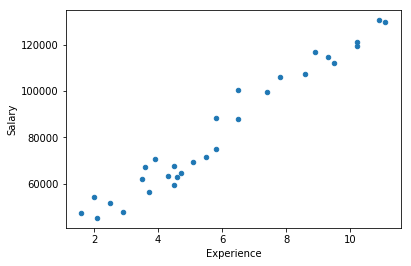

In [8]:
#plotting the data
data.plot(kind='scatter',x='Experience',y='Salary')

In [9]:
#Train and Test Split
train, test = train_test_split(data, test_size=0.2)

In [44]:
#Converting training data into tensors for Pytorch
X_train = torch.Tensor([[x] for x in list(train.Experience)])
y_train = torch.torch.FloatTensor([[x] for x in list(train.Salary)])

#Converting test data into tensor for Pytorch
X_test = torch.Tensor([[x] for x in list(test.Experience)])
y_test = list(test.Salary)

In [45]:
X_train

tensor([[ 1.6000],
        [ 9.5000],
        [ 2.9000],
        [ 5.1000],
        [ 5.5000],
        [ 8.6000],
        [ 4.5000],
        [ 4.7000],
        [ 3.7000],
        [10.2000],
        [10.2000],
        [ 8.9000],
        [ 7.4000],
        [ 4.6000],
        [ 3.5000],
        [ 7.8000],
        [ 3.6000],
        [ 6.5000],
        [ 3.9000],
        [ 4.3000],
        [10.9000],
        [ 4.5000],
        [ 5.8000],
        [ 2.0000]])

In [46]:
class LinearRegression(nn.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.lin = nn.Linear(in_features=in_size, out_features=out_size)
    def forward(self,X):
        pred = self.lin(X)
        return(pred)

In [47]:
# Setting the seed or random_state for reproducibility
torch.manual_seed(1)

#Initializing the Linear model
model = LinearRegression(1 , 1)

In [48]:
#Unpacking the parameters
[w,b] = model.parameters()

In [49]:
#A method for getting the parameter values from the tensor object
def get_parameters():
    return(w[0][0].item(), b[0].item())

In [50]:
#A method for plotting the regressor
def plot_model(name):
    plt.title(name)
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    w1, b1 = get_parameters()
    X1 = np.array([-15, 15])
    Y1 = w1 * X1 + b1
    plt.plot(X1, Y1, 'g')
    plt.scatter(X_train,y_train)
    plt.show()

In [51]:
#Printing the initial model parameters
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


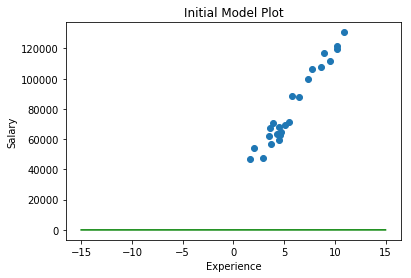

In [52]:
#Plotting the regression with initial weight and bias
plot_model("Initial Model Plot")

In [53]:
#Initializing the loss function as Mean Squared Error
loss_fun = nn.MSELoss()
#Initializing the optimizer as Stochastic Gradient Descent with the model parameters and  learning rate 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [54]:
# Training the model
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = loss_fun(y_pred, y_train)
    print("@epoch : ", i, " #Loss : ", loss.item())
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

@epoch :  0  #Loss :  7281850880.0
@epoch :  1  #Loss :  317270528.0
@epoch :  2  #Loss :  140734944.0
@epoch :  3  #Loss :  135580832.0
@epoch :  4  #Loss :  134758304.0
@epoch :  5  #Loss :  134049800.0
@epoch :  6  #Loss :  133348824.0
@epoch :  7  #Loss :  132652632.0
@epoch :  8  #Loss :  131961072.0
@epoch :  9  #Loss :  131274224.0
@epoch :  10  #Loss :  130592000.0
@epoch :  11  #Loss :  129914392.0
@epoch :  12  #Loss :  129241336.0
@epoch :  13  #Loss :  128572784.0
@epoch :  14  #Loss :  127908784.0
@epoch :  15  #Loss :  127249232.0
@epoch :  16  #Loss :  126594160.0
@epoch :  17  #Loss :  125943464.0
@epoch :  18  #Loss :  125297232.0
@epoch :  19  #Loss :  124655216.0
@epoch :  20  #Loss :  124017624.0
@epoch :  21  #Loss :  123384352.0
@epoch :  22  #Loss :  122755272.0
@epoch :  23  #Loss :  122130520.0
@epoch :  24  #Loss :  121509912.0
@epoch :  25  #Loss :  120893520.0
@epoch :  26  #Loss :  120281256.0
@epoch :  27  #Loss :  119673112.0
@epoch :  28  #Loss :  119069

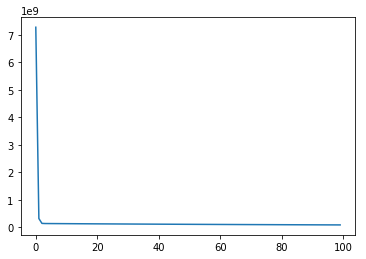

In [55]:
#Visualizing the loss curve
plt.plot(range(epochs), losses)

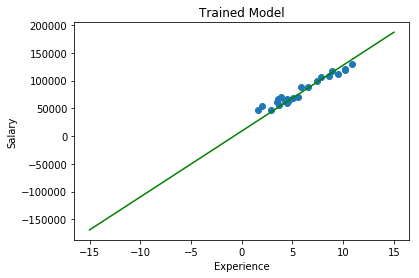

In [56]:
#Visualizing the trained regressor
plot_model("Trained Model")

In [57]:
#Predicting for X_test
y_pred_test = model.forward(X_test)

In [58]:
#Converting predictions from tensor objects into a list
y_pred_test = [y_pred_test[x].item() for x in range(len(y_pred_test))]
print(y_pred_test)
# Comparing Actual and predicted values
df = {}
df['Actual Observation'] = y_test
df['Predicted Salary'] = y_pred_test
df = pd.DataFrame(df)
print(df)

[119526.7421875, 86251.7734375, 77933.0390625, 33962.546875, 140917.796875, 38716.11328125]
   Actual Observation  Predicted Salary
0              114755     119526.742188
1              100504      86251.773438
2               74762      77933.039062
3               45131      33962.546875
4              129741     140917.796875
5               51802      38716.113281


In [59]:
y_pred_test

[119526.7421875,
 86251.7734375,
 77933.0390625,
 33962.546875,
 140917.796875,
 38716.11328125]

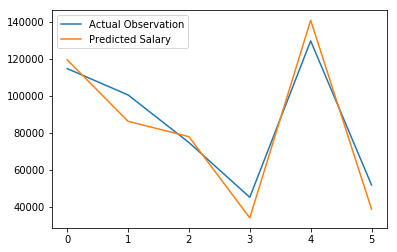

In [60]:
#Visualizing Actual and predicted values
df.plot()